# **Algorithme des libellules:** SOKRI Yasser                  

*   ***Réalisé par:***  SOKRI Yasser
*   ***Encadré par:***  Monsieur Elkhafi Hamza 

1.   ## Implementation





```
# Source d'inspiration
```





* L'inspiration principale de l'Algorithme Dragonfly (DA) proposé en 2015 provient des comportements grouillants d'une libellule. La raison de leur essaimage est soit la migration, soit la chasse (essaim dynamique ou essaim statique respectivement). 
* Dans un essaim statique, de petits groupes de libellules se déplacent sur une petite zone pour chasser d'autres insectes. 
* Les comportements de ce type d'essaimage comprennent des mouvements locaux et des changements brusques. 
* Dans l'essaimage dynamique, cependant, un nombre massif de libellules créent un seul groupe et se déplacent dans une direction sur une longue distance. Selon Reynolds, le comportement des essaims suit trois principes primitifs : 
** La séparation, qui fait référence à l'évitement statique des collisions entre les individus et les autres individus du voisinage. 
** L'alignement, qui indique l'appariement de la vitesse des individus à celle des autres individus du voisinage. 
** Cohésion, qui fait référence à la tendance des individus vers le centre de masse du quartier.



```
# Fonctionnement
```




* La base de cet algorithme repose sur le rapprochement spatial des libellules des sources de nourriture et d'évasion du danger (ennemi) tout en exploitant les aspects de déplacement que sont la séparation, la cohésion et l'alignement.
* Afin de bénéficier des points forts de cet algorithme, nous avons fait une projection sur celui-ci sur notre problème étudié et nous avons décidé de procéder comme suit : 
- La notion de position dans l'espace des libellules sera remplacée par notre fonction objectif (PSNR). 
- La meilleure et la pire solution trouvée dans une population sera définie comme source de nourriture et de danger. 
- Pour conserver les actions de déplacement vers la source alimentaire, nous avons mis en place : 
  - Une méthode d'héritage des bonnes caractéristiques de la meilleure solution voisine afin de s'en rapprocher. 
  - Un historique de toutes les mauvaises solutions est maintenu afin de s'éloigner des ennemis. 
  - L'aspect diversification géré par le vol de Lévy se traduit par une reconstruction aléatoire de la solution.


```
# Intensification / diversification
```

* Pour passer de l'intensification à la diversification, les libellules doivent modifier leur poids de manière adaptative. Cela garantit la convergence des individus de libellule pendant le processus d'optimisation. 
* Au fur et à mesure que le processus d'optimisation progresse, pour ajuster la trajectoire de vol, la zone de voisinage est agrandie, donc à l'étape finale de l'optimisation, l'essaim devient un groupe pour converger vers un optimum global. 
* Les meilleures et les pires solutions trouvées jusqu'à présent deviennent respectivement la source de nourriture et l'ennemi. Cela encourage la convergence et la divergence vers la zone prometteuse et la zone extérieure non prometteuse de l'espace de recherche respectivement.

```
# Avantages et desavantages
```

* DA est l'un des algorithmes les plus récemment développés, il a été utilisé pour optimiser divers problèmes dans différents domaines. 
* L'une des raisons pour lesquelles cet algorithme pourrait contribuer à différentes applications est qu'il est très simple, facile à mettre en œuvre et adapté à des applications dans différents domaines. 
* De plus, avoir peu de paramètres pour le réglage est un autre avantage de DA
* Le temps de convergence de l'algorithme est raisonnable. Comparé à d'autres algorithmes d'optimisation, il est plus rapide et peut facilement être fusionné avec d'autres algorithmes. 
* En revanche, il ne possède pas de mémoire interne ce qui pourrait conduire à une convergence prématurée vers l'optimum local. 
* Cet inconvénient a été surmonté en proposant un nouvel algorithme hybride Dragonfly basé sur la mémoire (MHDA). 
* De plus, DA est facilement coincé dans les optima locaux car il a un taux d'exploitation élevé. 
* Le mécanisme de vol Levy a été utilisé pour modéliser le comportement de vol aléatoire des libellules dans la nature. 
* Les inconvénients du vol Levy sont le débordement de la zone de recherche et l'interruption des vols aléatoires du fait de ses grandes étapes de recherche.



```
# Algorithme:
```



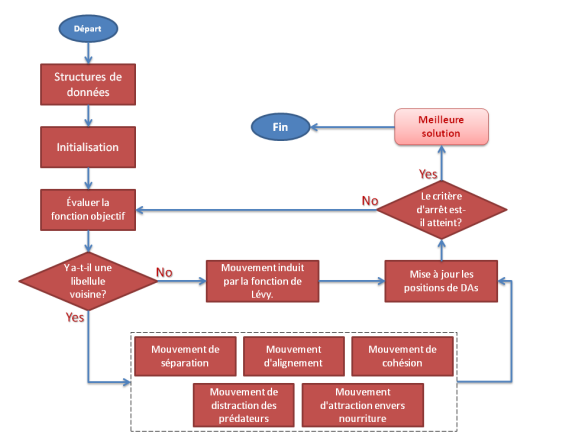

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

- Je choisie comme nombre de villes: 5
- Et comme dimension de population: 10

In [45]:
N=5
M=10
k=0

population = []

## Définition de la fonction fitness

In [46]:
def fitness():
  global chemin
  distance = 0.0
  xy = np.column_stack((x[chemin], y[chemin]))
  distance = np.sum( np.sqrt( np.sum( (xy - np.roll(xy, -1, axis=0) )**2, axis=1) ) )
  return distance

## Choix des coordonnées des points villes

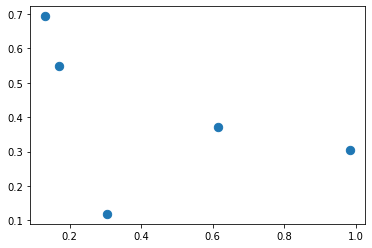

In [47]:
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)
chemin = np.arange(N)
plt.scatter(x, y, s=70)

## Determiner une population initiale & Calcule de fitness de chaque individue

In [48]:
FoodValue = 0
EnemyValue = 0

#-------------------- FOR1
for i in range(0, M, 1):
    population.append([0]*N)

    #--------------------------- FOR2
    for j in range(0, N, 1):
          bool = 1
          if j==0 : 
              element = rd.randint(0, N-1)
          else:
              #--------------------------- WHILE
              while bool==1:
                      #---------------------- Affecter une valeur a element
                      element = rd.randint(0, N-1)
                      #---------------------- VARIABLE l POUR LE TEST 
                      l=0
                      #---------------------- Tester si on a visité sur une meme ville deux fois
                      for k in range(0, j, 1):
                          if population[i][k] == element :
                            bool = 1
                            l = l + 1
                      if l==0: 
                          bool=0
              #--------------------------- END OF WHILE
                  
          population[i][j] = element
          chemin[j] = population[i][j]
    ##-----------
    d = fitness()
    if i==0:
      FoodValue = d
      EnemyValue = d
      Food = population[i]
      Enemy = population[i]

    if d > EnemyValue : 
        EnemyValue = d
        Enemy = population[i]
    if d < FoodValue : 
        Food = population[i]
        Food = d
    ##----------
    print('Pop ', i, ' ', population[i], ' fitness= ', d)
#---------------------- END OF FOR 1
print("----------------------------------")
print('- FOOD ---> ', Food ,'\n- ENEMY ---> ',Enemy  )
print("----------------------------------")
print(population)

Pop  0   [1, 3, 2, 4, 0]  fitness=  2.258787978133552
Pop  1   [0, 2, 4, 1, 3]  fitness=  3.2135741161912597
Pop  2   [3, 4, 1, 2, 0]  fitness=  3.2617184336273315
Pop  3   [0, 2, 3, 4, 1]  fitness=  2.372778917061374
Pop  4   [3, 0, 4, 1, 2]  fitness=  2.6652967235283893
Pop  5   [1, 4, 3, 0, 2]  fitness=  3.2617184336273315
Pop  6   [2, 1, 3, 4, 0]  fitness=  3.2110104310558496
Pop  7   [2, 1, 0, 3, 4]  fitness=  2.8400710693122266
Pop  8   [2, 1, 0, 4, 3]  fitness=  2.3069322955696245
Pop  9   [2, 3, 4, 1, 0]  fitness=  2.372778917061374
----------------------------------
- FOOD --->  [1, 3, 2, 4, 0] 
- ENEMY --->  [3, 4, 1, 2, 0]
----------------------------------
[[1, 3, 2, 4, 0], [0, 2, 4, 1, 3], [3, 4, 1, 2, 0], [0, 2, 3, 4, 1], [3, 0, 4, 1, 2], [1, 4, 3, 0, 2], [2, 1, 3, 4, 0], [2, 1, 0, 3, 4], [2, 1, 0, 4, 3], [2, 3, 4, 1, 0]]
